<a href="https://colab.research.google.com/github/MarvelousAlex/Python_Data_Analysis/blob/main/28_Matplotlib_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Intro

## Overview

### Notes
* Matplotlib is a library for creating static, interactive, and animated visualizations in Python.
* Some of the major plot types available in Matplotlib are line, bar, scatter, histogram, and pie charts, along with many others.
* It's highly customizable and can be used to create complex plots by layering elements.

### Importance

* Matplotlib is crucial for data analysis, it offers a way to visualize data and insights in a graphical format.
* It facilitates the understanding of data through visual representation, making it easier to detect patterns, trends, and outliers.
* Supports a wide range of graphs and plots including visualizations like 3D plots and interactive graphs for in-depth analysis.
* Integrates with Pandas and NumPy, easy to go from data manipulation to visualization.

### Import

* To use Matplotlib, you first need to import it, usually alongside Pyplot, which is a plotting module.
* The import convention is to import `matplotlib.pyplot` as `plt`, simplifying the reference to the module while coding.

You can view the official documentation on the charts [here](https://matplotlib.org/stable/plot_types/index.html).

## Loading Data

### Notes

* Let's load in the data from the CSV using `pd.read_csv()`.

### Example

Let's load in our file. Don't forget to load and install (only in Google Collab do you have to install every time) the `datasets` library every time you open a new session.

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

### Plotting a simple line plot

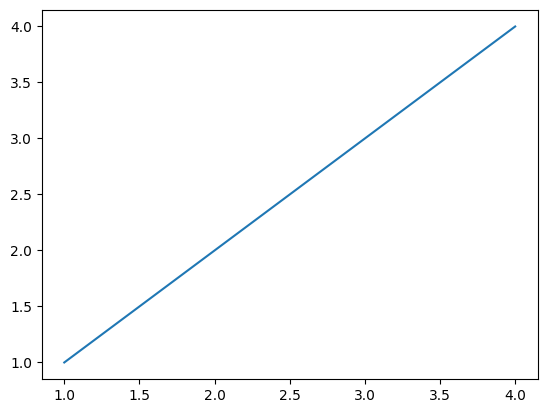

In [2]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x,y)

We can remove that:
> [<matplotlib.lines.Line2D at 0x1a035b6d0>]  

By adding `plt.show()` although it's not required in Jupyter Notebooks.

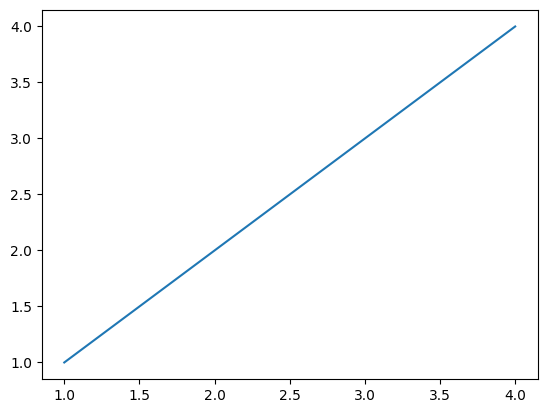

In [3]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()

# Line Graphs

### Notes

* `plot()` is used to draw points in a diagram.
* The default draws a line from point to point.
* It takes parameters for specifying points in the graph.
  * First parameter is the *x-axis*.
  * Second parameter is the *y-axis*.
  * Like this: `plt.plot(x-axis,y-axis)`.
* Used to display information as a series of data points called 'markers' connected by straight line segments.
* Ideal for showing trends over time or continuous data.

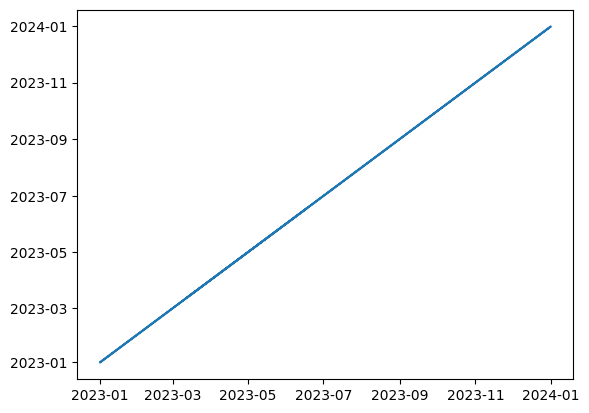

In [4]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

Alternatively, we can compress what we have written:

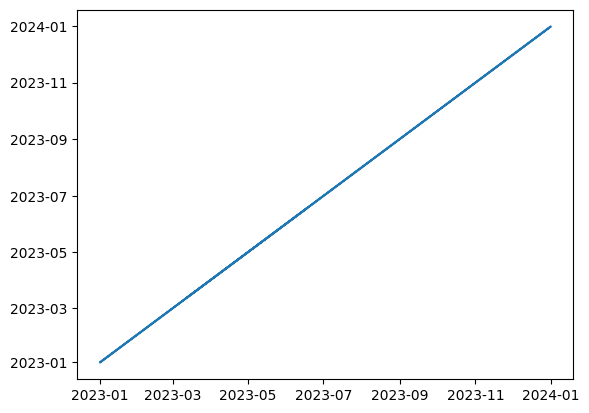

In [5]:
plt.plot(df.job_posted_date, df.job_posted_date, data=df)
plt.show()

But we want the counts of job over time.

What happens if we just aggregated by `job_posted_date`?

In [6]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

date_counts

,count
job_posted_date,
2023-01-01 00:00:04,1
2023-01-01 00:00:07,1
2023-01-01 00:00:22,1
2023-01-01 00:00:24,1
2023-01-01 00:00:27,1
...,...
2023-12-31 23:40:18,2
2023-12-31 23:40:22,2
2023-12-31 23:40:31,2


### NOTE - `Series`

This `date_counts` is a `Series` object and NOT a `DataFrame`, it behaves differently then a DataFrame.

We can access the values of a `Series` object by passing the whole `Series` or specifying `Series.values`

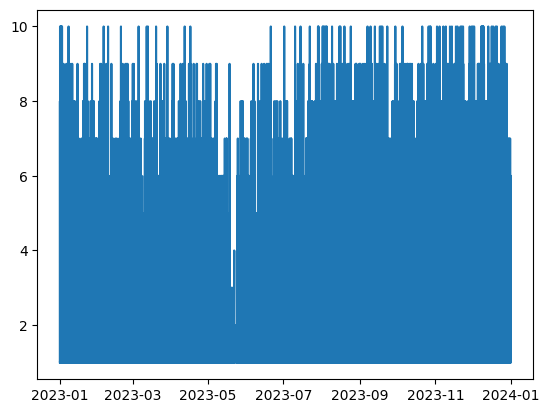

In [7]:
plt.plot(date_counts.index, date_counts)
plt.show()

Here we specify `Series.values`, it's a 1-D array effectively so either will work.

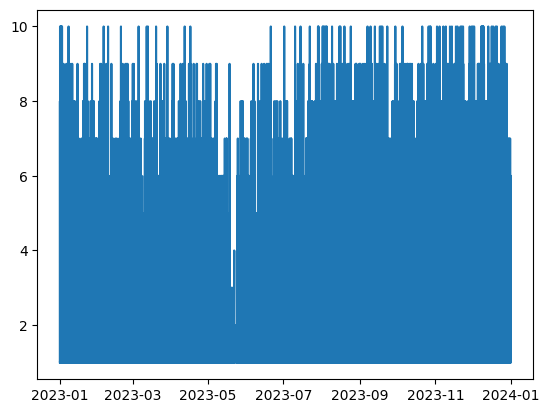

In [8]:
plt.plot(date_counts.index, date_counts.values)
plt.show()

This is a hot mess....

We need to extract the month using the attribute `dt` accessor and the attribute of `.month` from the `job_posted_date`.

In [9]:
# Assuming 'job_posted_date' is already converted to datetime format in the original df
df.job_posted_month = df.job_posted_date.dt.month

# Group by 'month' and count the job postings
monthly_counts = df.job_posted_month.value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts

/tmp/ipython-input-3994191866.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.job_posted_month = df.job_posted_date.dt.month


,count
job_posted_date,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


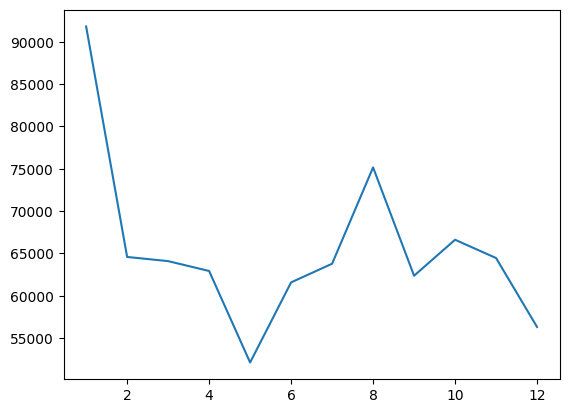

In [10]:
plt.plot(monthly_counts.index, monthly_counts)

## Series vs DataFrames in Pandas

A Series is one of the core data structures in pandas, akin to a one-dimensional array (like in NumPy) BUT with powerful, flexible indexing capabilities.

#### Core Characteristics
- One-Dimensional: It's essentially a single column of data.
- Indexed: Each element in a Series has an associated label, known as the index. The index can be numbers, dates, or even strings.
- Diverse Data Types: A Series can hold any data type—integers, strings, floats, Python objects, etc. However, all elements within a Series must be of the same data type.

In [11]:
# Creating a Series from a list
data = [10, 20, 30, 40, 50]
series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])

In [12]:
# show how to access the values of the series using 'values'ArithmeticError
series.values

array([10, 20, 30, 40, 50])

In [13]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

# Bar Charts

### Notes

* Used to compare different groups or to track changes over time.
* Best for categorical data comparison.
* In Python we have two types of bar charts:
    1. Bar Plots - bars are vertical
    2. Horizontal Bar Plot - bars are horizontal

### Bar Plot

#### Notes

* `plt.bar()` for vertical bar plots.
* Syntax: `plt.bar(categories, values)`
* The bars are vertical.

Then we get the value counts of the job titles for the filtered DataFrame.

In [14]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df.job_title_short.value_counts()
job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


Now let's plot `job_counts`

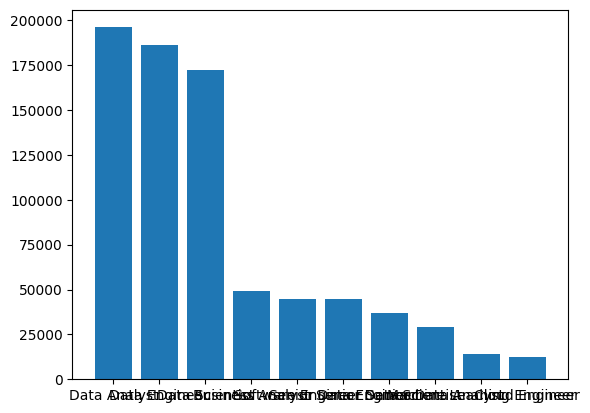

In [15]:
plt.bar(job_counts.index, job_counts.values)
plt.show()

This isn't that readable. Instead, let's only get the top 3 most requested job titles in the United States. We're only getting the top 3 because that's all that fits on the x-axis without having to customize the x-axis using something else (which we will do in a bit).

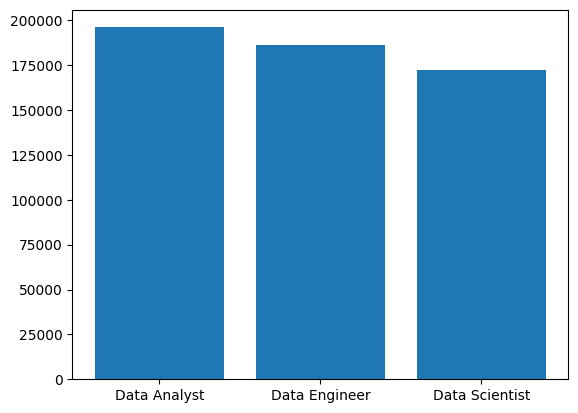

In [16]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df.job_title_short.value_counts().head(3) # Only top 3

# Plot the job counts
plt.bar(job_counts.index, job_counts.values)
plt.show()

### Horizontal Bar Plot

#### Notes

* This is similar to a bar chart but the bars are horizontal.
* Even the syntax is similar: `plt.barh(categories, values)`.
* It's useful when chart labels are lengthy (like in our previous example).
* Good for comparing the size of categories or when the text labels are too long to fit well under a vertical bar.

#### Example

Let's redo our graph and make it a horizontal bar chart instead. This way we can look at more jobs without having to format the axis. Let's look at the top 5.

In [17]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df.job_title_short.value_counts()
job_counts = job_counts.head(6)
job_counts = job_counts.sort_values(ascending=True)

job_counts

,count
job_title_short,
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241
Data Analyst,196075


For readability, you can use parenthesis instead if chaining multiple methods

In [18]:
job_counts = (
    df.job_title_short
    .value_counts()
    .head(6)
    .sort_values(ascending=True)
)

job_counts

,count
job_title_short,
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241
Data Analyst,196075


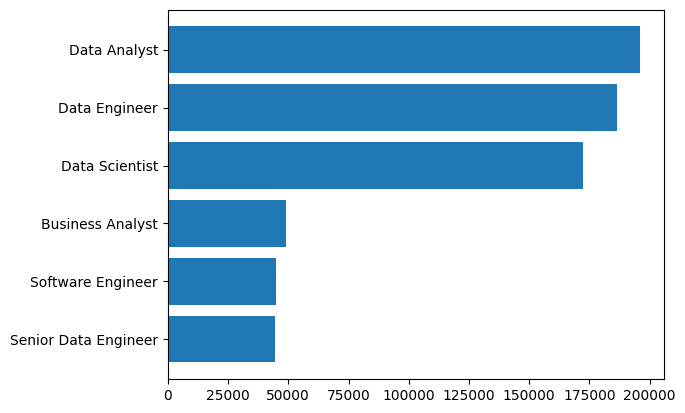

In [19]:
plt.barh(job_counts.index, job_counts) # Changed this to be a horizontal bar chart instead
plt.show()

### Note - `plt.show()`

* You may see `plt.show()` at the bottom of some plots, but it's not required in Jupyter Notebooks [per the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html):
> **Auto-show in jupyter notebooks**  
> The jupyter backends (activated via %matplotlib inline, %matplotlib notebook, or %matplotlib widget), call show() at the end of every cell by default. Thus, you usually don't have to call it explicitly there.
* TLDR: Inside of Jupyter Notebooks, the functionality automatically shows the graph

# Matplotlib Labeling

## Notes

Below are some basic functions to add labeling to a chart:

* `title()` - Set a title for the graph
* `xlabel()` - Set the labels of the x-axis
* `ylabel()` - Set the labels of the y-axis
* `xticks()` - Customize the x-axis
    * `rotation` - rotate the label by X amount of degrees e.g. `plt.xticks(rotation=45)` to rotate the x-axis labels by 45 degrees
* `yticks()` - Customize the y-axis

## Example

Let's re-do the graph we did in the last section (for the horizontal line chart) and add in:
* Title
* x & y labels
* Turn the graph back into a regular bar chart
* To view all the titles we're going to rotate the x-labels by 45

First let's get our data in a series

In [20]:
job_counts = df['job_title_short'].value_counts()

job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


<BarContainer object of 10 artists>

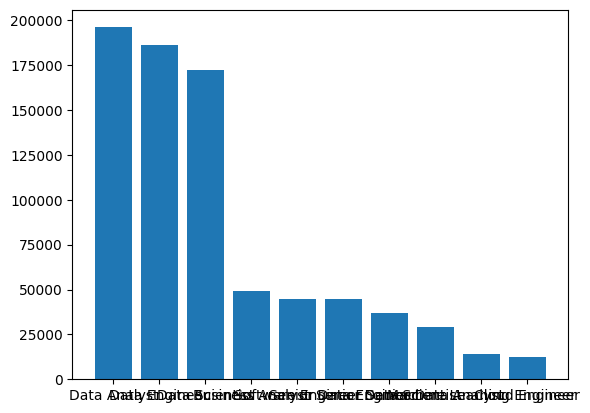

In [21]:
# Original Plot
plt.bar(job_counts.index, job_counts)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Data Analyst'),
  Text(1, 0, 'Data Engineer'),
  Text(2, 0, 'Data Scientist'),
  Text(3, 0, 'Business Analyst'),
  Text(4, 0, 'Software Engineer'),
  Text(5, 0, 'Senior Data Engineer'),
  Text(6, 0, 'Senior Data Scientist'),
  Text(7, 0, 'Senior Data Analyst'),
  Text(8, 0, 'Machine Learning Engineer'),
  Text(9, 0, 'Cloud Engineer')])

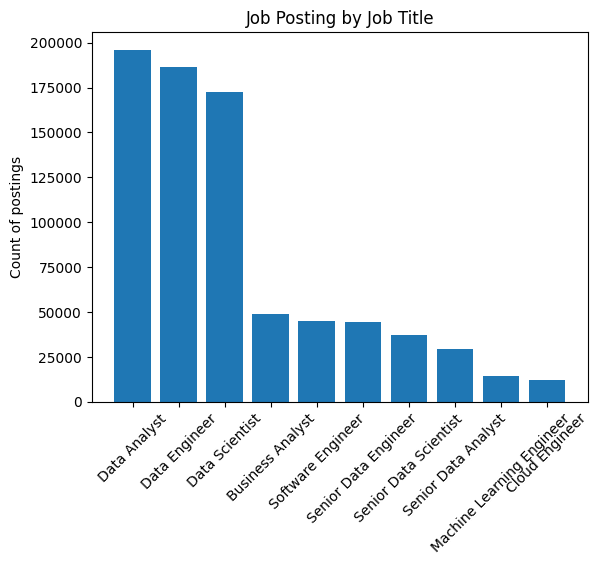

In [22]:
plt.bar(job_counts.index, job_counts)
plt.ylabel('Count of postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Posting by Job Title')
plt.xticks(rotation = 45)

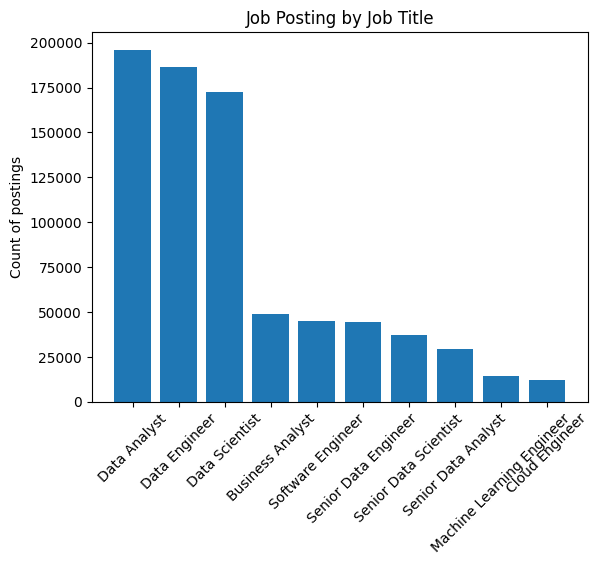

In [23]:
plt.bar(job_counts.index, job_counts)
plt.ylabel('Count of postings')
plt.title('Job Posting by Job Title')
plt.xticks(rotation = 45)

plt.show()

The x labels are all jacked up let's fix this using the arguements `ha` and `va` in the `.xticks()` method.
- `ha='right'`: Aligns the right edge of the label with the tick mark, which compensates for the rotation and helps center the label.
- `va='top'`: Adjusts the vertical alignment to keep the text above the tick mark and prevent it from overlapping with the x-axis.

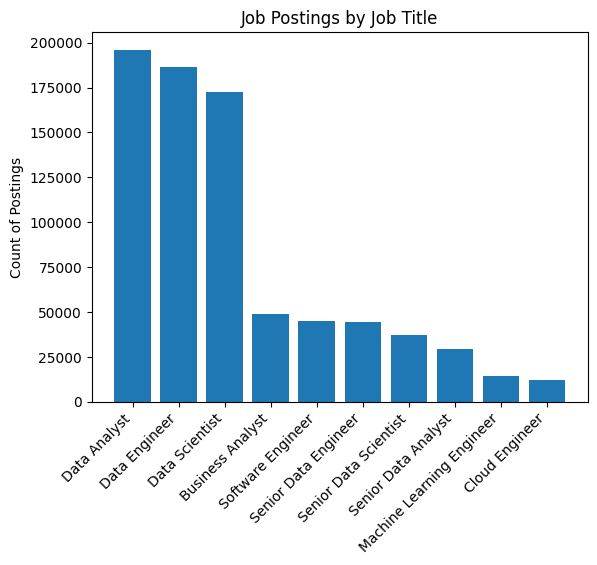

In [24]:
plt.bar(job_counts.index, job_counts)
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()